<a href="https://colab.research.google.com/github/priyankashinde-DS/Capstone_project-Netflix_Movies-TV_Shows/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**
---

**1.show_id :** Unique ID for every Movie / Tv Show

**2.type :** Identifier - A Movie or TV Show

**3.title :** Title of the Movie / Tv Show

**4.director :** Director of the Movie

**5.cast :** Actors involved in the movie / show

**6.country :** Country where the movie / show was produced

**7.date_added :** Date it was added on Netflix

**8.release_year :** Actual Releaseyear of the movie / show

**9.rating :** TV Rating of the movie / show

**10.duration :** Total Duration - in minutes or number of seasons

**11.listed_in :** Genere

**12.description:** The Summary description

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Importing Libraries**

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections 
import plotly.graph_objs as gobj
from plotly.offline import iplot

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

# **2.Data importing**

In [400]:
# loading csv file to pandas dataframe
netflix_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Unsupervised ML-Clustring/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **3.Data Exploration**

In [401]:
# Let's take look at top row of dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [402]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [403]:
# Shpae of Dataset
print( 'Number of Rows: {}'.format( netflix_df.shape[0] ) )
print( 'Number of Columns: {}'.format( netflix_df.shape[1] ) )

Number of Rows: 7787
Number of Columns: 12


In [404]:
netflix_df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [405]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **4. Data Cleaning**

## **4.1 Checking NaN values**

In [406]:
#Check NAN values
NaN_df = pd.DataFrame({"No Of Total Values": netflix_df.shape[0] , "'Missing values count": netflix_df.isnull().sum(),
                    "%age of NaN values" : round((netflix_df.isnull().sum()/ netflix_df.shape[0])*100 , 2) })
NaN_df.sort_values("'Missing values count" , ascending = False)

,No Of Total Values,'Missing values count,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


**5 columns have missing values, with Director missing 1/3 of the time.**
---

* **Director column has highest NaN values "30.7%" data is missing.**

* **Cast column has "9%" NaN values.**

* **country , date_added , rating this columns also containing missing values.**

## **4.2 Dealing with Nan Values.**

In [407]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)

## **4.3 Lets check NaN values on data_added**

In [408]:
data_added_Nan_df = netflix_df[netflix_df['date_added'].isna()]
data_added_Nan_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,No Director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,No Director,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,No Director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


In [409]:
data_added_Nan_df.shape

(10, 12)

* **There are only 10 observations which are containing NaN values in data_added column.**

In [410]:
print(f"Before dropping the NaN values from date_added the shape was {netflix_df.shape}")
netflix_df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {netflix_df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 12)
After dropping the NaN values from date_added now the shape is (7777, 12)


## **4.4 Checking duplicate values**

In [411]:
df_duplicate = netflix_df[netflix_df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* **No duplicate values present in this dataset.**

# **5. Data Visualization**

## **5.1 Netflix Content By Type**

In [412]:
netflix_df['type'].value_counts().to_frame().T

,Movie,TV Show
type,5377,2400


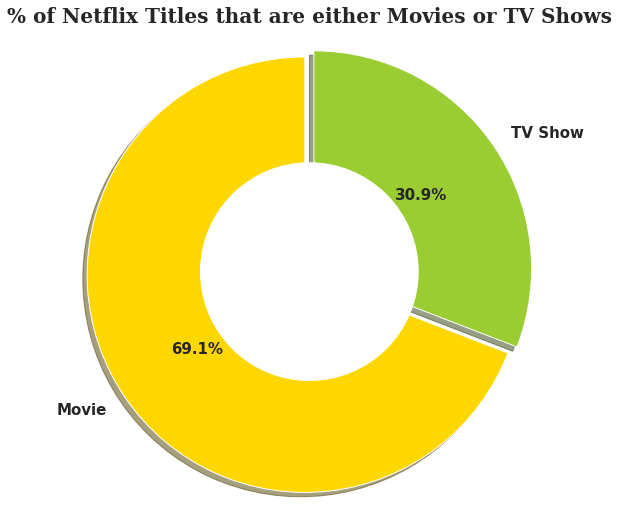

In [413]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,9))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['gold', 'yellowgreen'],
            autopct='%1.1f%%', startangle=90,shadow=True,textprops={'fontsize': 15,'fontweight':'bold'})

# scale the title up by 12% to match pctdistance
plt.title('% of Netflix Titles that are either Movies or TV Shows', fontsize=20, fontweight='bold', fontfamily='serif') 

plt.axis('equal') 

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# show plot
plt.show()

* #### **It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.(number of Movie is about twice as many as that of TV show).**

## **5.2 Title**

In [414]:
netflix_df.title.value_counts().to_frame()

,title
3%,1
Retablo,1
Ricky Gervais: Humanity,1
Richie Rich,1
Richard Pryor: Live in Concert,1
...,...
Handsome Siblings,1
Handsome Devil,1
Hamza's Suitcase,1
Hamid,1


### Let's view a wordcloud to get an overview of Netflix titles.

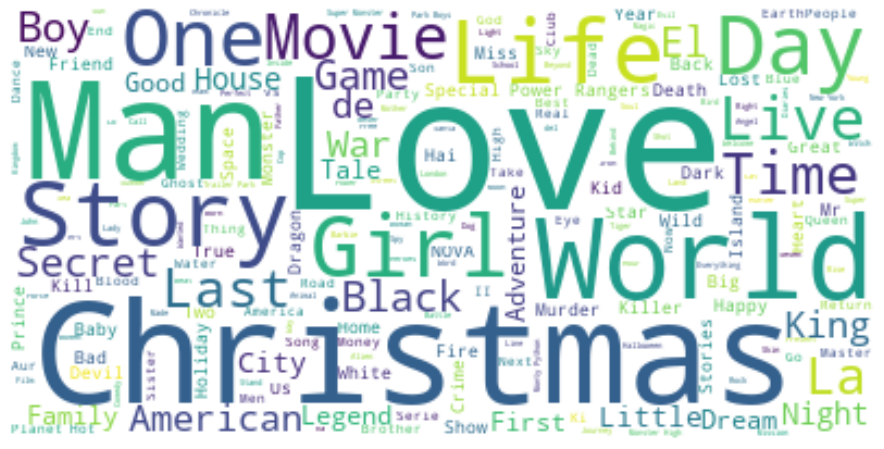

In [415]:
plt.figure(figsize=(20,8))
#subsetting df
df_wordcloud = netflix_df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **5.2 country**

In [416]:
# country with there count
netflix_df.country.value_counts().rename_axis('Country').reset_index(name='Count')

,Country,Count
0,United States,2549
1,India,923
2,United Kingdom,396
3,Japan,225
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


In [417]:
netflix_df[['country','type','title']].tail(5)

,country,type,title
7782,"Sweden, Czech Republic, United Kingdom, Denmar...",Movie,Zozo
7783,India,Movie,Zubaan
7784,NaN,Movie,Zulu Man in Japan
7785,Australia,TV Show,Zumbo's Just Desserts
7786,"United Kingdom, Canada, United States",Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS


In [418]:
netflix_df.country.nunique()

681

#### In total, there are **"681" countries** that produce movies and tv shows. This is because one movie/ tv show can be made by more than one country, like the movie **ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS**, that was produced by the **United Kingdom, Canada, and the United States.**

In [419]:
netflix_df['country'].isna().sum()

506

#### Replace blank countries with the mode (most common) country.

In [420]:
# check most common country?
netflix_df['country'].mode()[0]

'United States'

In [421]:
# # Replace null values in country column with the United States
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Check if all the null values in country column are filled
netflix_df.country.isna().sum()

0

#### There is no NaN values present in **country column.**

In [422]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(netflix_df)):
  if isinstance(netflix_df['country'].iloc[i] , str):
    split=netflix_df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if netflix_df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if netflix_df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [423]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [424]:
#Top 5 countries
country_df.head()

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [425]:
# create list of country
categories = ", ".join(netflix_df['country']).split(",")

# list of most common 50 country
counter_list = collections.Counter(categories).most_common(50)
counter_list = counter_list[0:50]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = gobj.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))


#initializing the data variable
data = dict(type = 'choropleth',
            
            locations = labels,
            locationmode = 'country names',
            colorscale= 'Portland',
            
            text= labels,
            z=values,
            colorbar = {'title':'Country Colours', 'len':300,'lenmode':'pixels' })

layout = dict(geo = {'scope':'world'}, title_text ='Netflix shows in each country')

col_map = gobj.Figure(data = [data],layout = layout)

iplot(col_map)

In [426]:
# create count column for various plots
netflix_df['count'] = 1

# Lets retrieve just the first country from country col.
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])

# Reducing name length
netflix_df['first_country'].replace('United States', 'USA', inplace=True)
netflix_df['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

# Let's check few country
netflix_df['first_country'].head().to_frame()

,first_country
0,Brazil
1,Mexico
2,Singapore
3,USA
4,USA


Text(0.5, 1.0, 'Top 10 countries on Netflix')

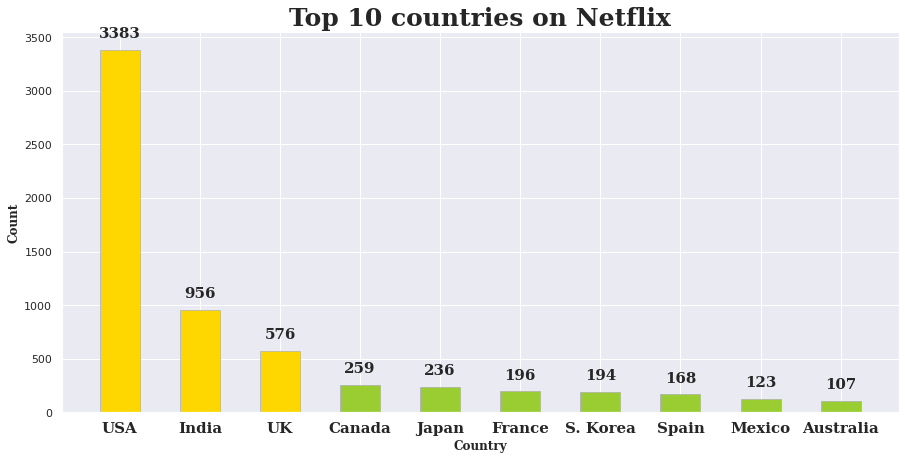

In [427]:
data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

color_map = ['yellowgreen' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  'gold' # color highlight

fig, ax = plt.subplots(1,1, figsize=(15, 7))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='bold', fontfamily='serif', fontsize=15)
  
ax.set_xticklabels(data.index,fontweight='bold', fontfamily='serif', fontsize=15)
plt.xlabel('Country',fontfamily='serif', fontsize=12,fontweight='bold')
plt.ylabel('Count',fontfamily='serif', fontsize=12,fontweight='bold')
ax.set_title( 'Top 10 countries on Netflix', fontsize=25, fontweight='bold', fontfamily='serif')

* **The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.**

* **It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.**

## **How does content by country vary?**

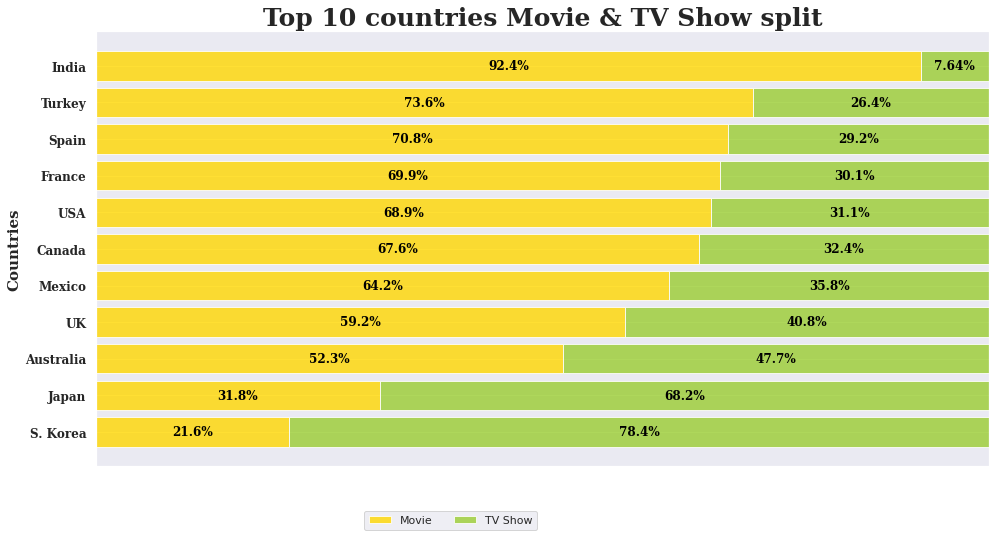

In [428]:
country_order = netflix_df['first_country'].value_counts()[:11].index
data_q2q3 = netflix_df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


###
fig, ax = plt.subplots(1,1,figsize=(16, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='gold', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='yellowgreen', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontweight='bold', fontfamily='serif',fontsize=12)
ax.set_title('Top 10 countries Movie & TV Show split', fontsize=25, fontweight='bold', fontfamily='serif')
plt.ylabel('Countries',fontweight='bold', fontfamily='serif',fontsize=15)   
ax.legend(loc='best', ncol=3 ,bbox_to_anchor=(0.5, -0.09))


# movie percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='black')
# tv show percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='bold', fontfamily='serif',
                   color='black')

* **Interestingly, Netflix in India
is made up nearly entirely of Movies.** 

* **Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.**

* **South Korean Netflix on the other hand is 
almost entirely TV Shows.**

* **The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.**

## **5.3 Director**

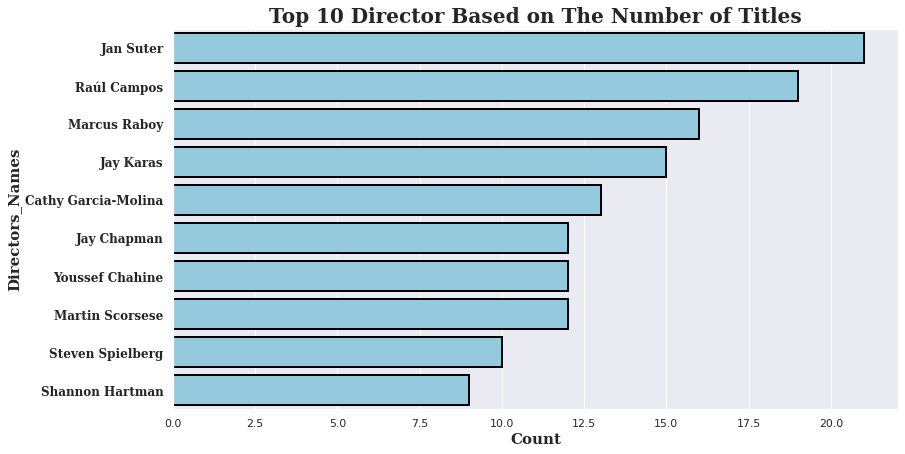

In [429]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10],color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_directors.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('Count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Directors_Names', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

## **5.4 Cast**

In [430]:
# create movie df
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
#create tvshow df
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
#create year col
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

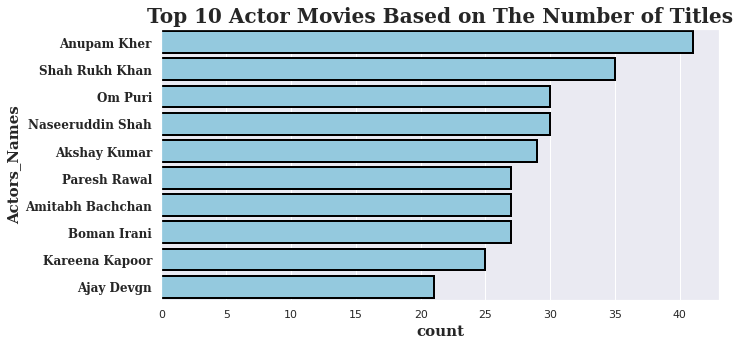

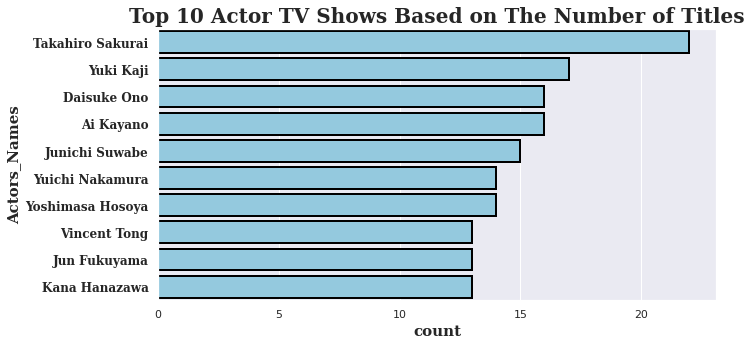

In [431]:
plt.figure(figsize=(10,5))
#top actor movies
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title('Top 10 Actor Movies Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_cast_movie.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Actors_Names', fontsize=15, fontweight='bold', fontfamily='serif')

plt.show()

plt.figure(figsize=(10,5))
#. Top Actor TV Shows on Netflix
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title('Top 10 Actor TV Shows Based on The Number of Titles', fontsize=20, fontweight='bold', fontfamily='serif')
ax = sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], color='skyblue',linewidth=2,edgecolor='black')
ax.set_yticklabels(filtered_cast_shows.value_counts().index[:10], fontweight='bold', fontfamily='serif',fontsize=12)
plt.xlabel('count', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Actors_Names', fontsize=15, fontweight='bold', fontfamily='serif')


plt.show()


## **5.5 Release year**

In [432]:
netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [433]:
netflix_df['release_year'].value_counts().to_frame()

,release_year
2018,1120
2017,1012
2019,996
2016,881
2020,868
...,...
1925,1
1964,1
1966,1
1947,1


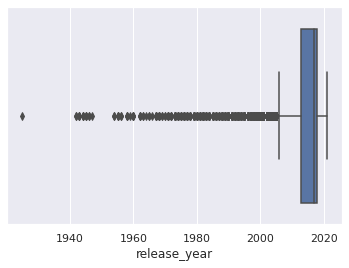

In [434]:
#plot relase year
sns.boxplot(netflix_df.release_year)

In [435]:
# top 15 relase year for  movie and tv shows
movie_release_yr = netflix_movies_df['release_year'].value_counts().sort_index(ascending=False).head(15)
shows_release_yr = netflix_shows_df['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=netflix_df['release_year'].value_counts().sort_index(ascending=False).head(15)

Text(0.5, 1.0, 'Production Growth Yearly')

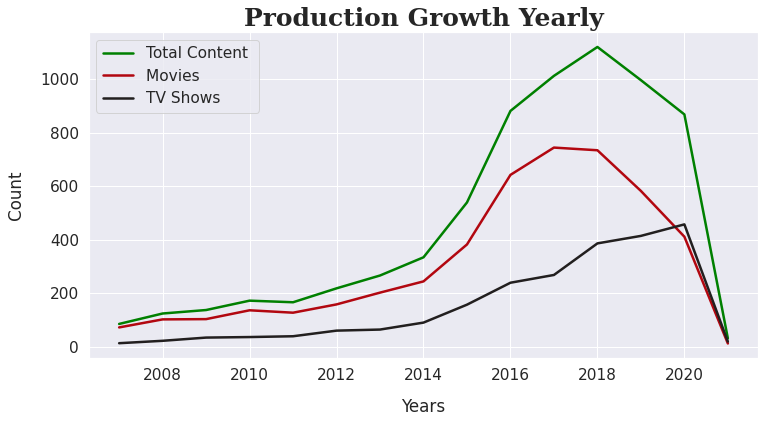

In [436]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content ")
movie_release_yr.plot(figsize=(12, 6), linewidth=2.5, color='#b20710',label="Movies ")
shows_release_yr.plot(figsize=(12, 6), linewidth=2.5, color='#221f1f',label="TV Shows ")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", fontsize=25, fontweight='bold', fontfamily='serif')

## **How has content been added over the years?**

In [437]:
# create new column of year from date_added col..
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df.date_added).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df.date_added).year

In [438]:
# create dataframes for movies and tv shows
yearadd_shows=netflix_shows_df['year_added'].value_counts().sort_index(ascending=False).head(15)
yearadd_movies=netflix_movies_df['year_added'].value_counts().sort_index(ascending=False).head(15)

Text(0.5, 1.0, 'Movies & TV Shows added over time')

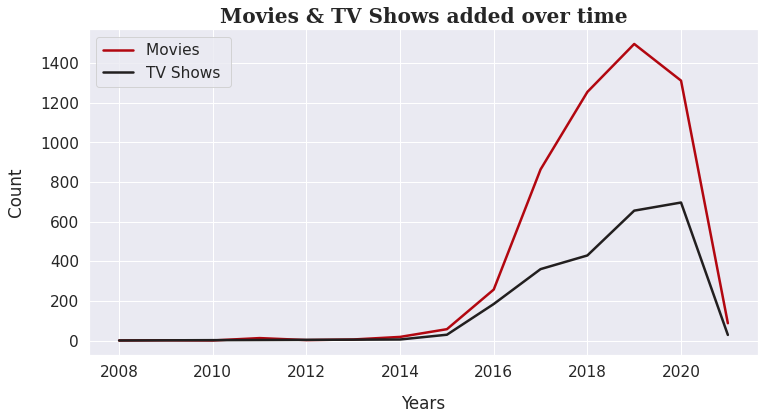

In [439]:
sns.set(font_scale=1.4)
yearadd_movies.plot(figsize=(12, 6), linewidth=2.5, color='#b20710',label="Movies ")
yearadd_shows.plot(figsize=(12, 6), linewidth=2.5, color='#221f1f',label="TV Shows ")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.legend()
plt.title('Movies & TV Shows added over time', fontsize=20, fontweight='bold', fontfamily='serif')

* **We see a slow start for Netflix over several years. 
Things begin to pick up in 2014 and then there is a 
rapid increase from 2016.**

* **It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.**

* **Netflix peak global content amount was in 2019.**

* **It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.**

## **Month-by-Month**

### We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

In [440]:
import calendar

In [441]:
# create new column of month from date_added col..
netflix_df['month_name_added'] = pd.DatetimeIndex(netflix_df.date_added).month

# get months name 
netflix_df['month_name_added'] = netflix_df['month_name_added'].apply(lambda x: calendar.month_abbr[x])

In [442]:
netflix_df['month_name_added'].value_counts().sort_values(ascending=False)

Dec    833
Oct    785
Jan    757
Nov    738
Mar    669
Sep    619
Aug    618
Apr    601
Jul    600
May    543
Jun    542
Feb    472
Name: month_name_added, dtype: int64

In [443]:
netflix_df['month_name_added'].value_counts().sort_values(ascending=False).index

Index(['Dec', 'Oct', 'Jan', 'Nov', 'Mar', 'Sep', 'Aug', 'Apr', 'Jul', 'May',
       'Jun', 'Feb'],
      dtype='object')

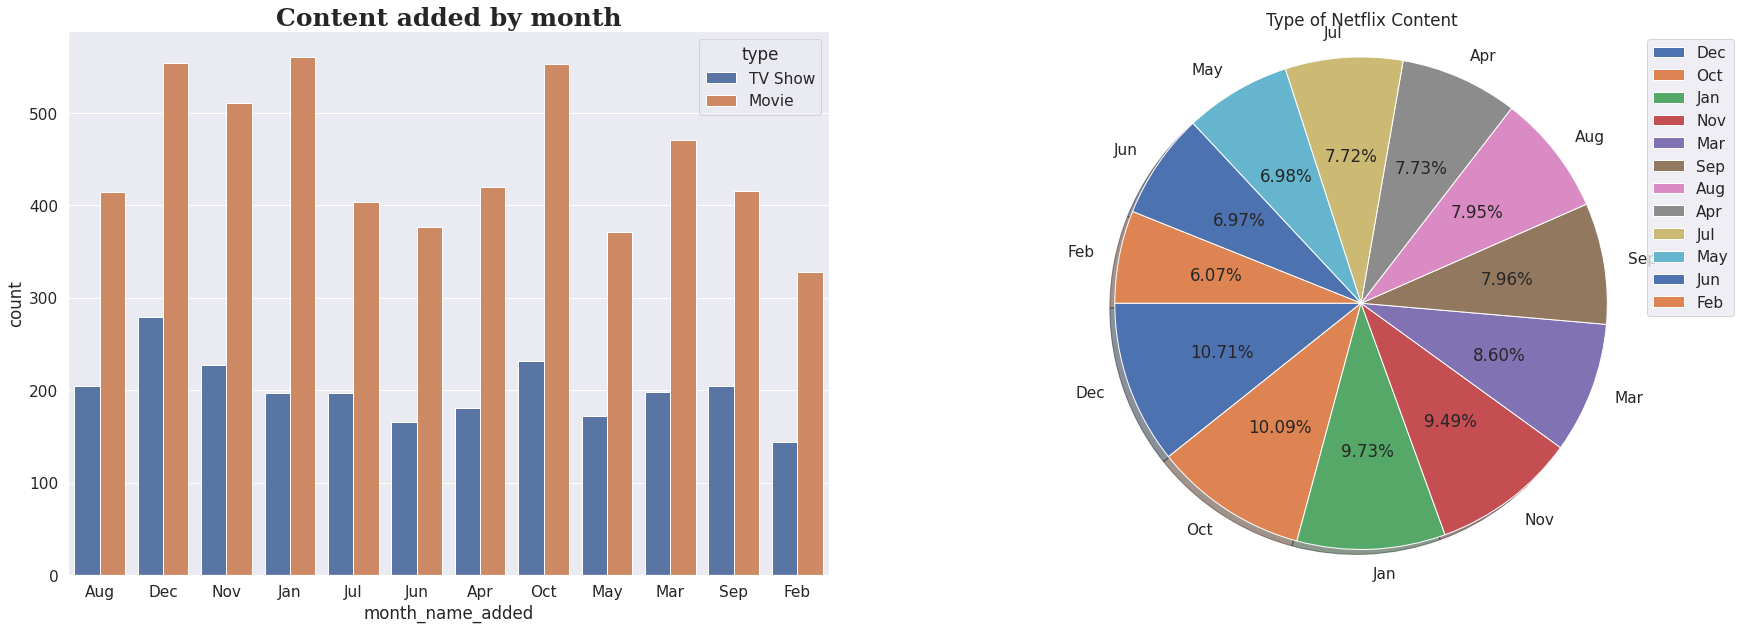

In [444]:
plt.figure(figsize=(30,10))
plt.subplot(121)
ax = sns.countplot(netflix_df['month_name_added'],hue=netflix_df.type)

ax.set_title('Content added by month', fontsize=25, fontweight='bold', fontfamily='serif')

plt.subplot(122)
#Plotting pie chart on type feature
labels = netflix_df['month_name_added'].value_counts().sort_values(ascending=False).index

plt.pie(netflix_df['month_name_added'].value_counts().sort_values(ascending=False),labels=labels,
        autopct='%1.2f%%', startangle=180,shadow=True)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.legend(labels,loc='best')
plt.show()

### The end & beginnings of each year seem to be Netflix's preference for adding content.

### **December & October** are definitely the best months for new content. Maybe Netflix knows that people have a lot of time off from work over this period.

## **5.6 Rating**

In [445]:
netflix_df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

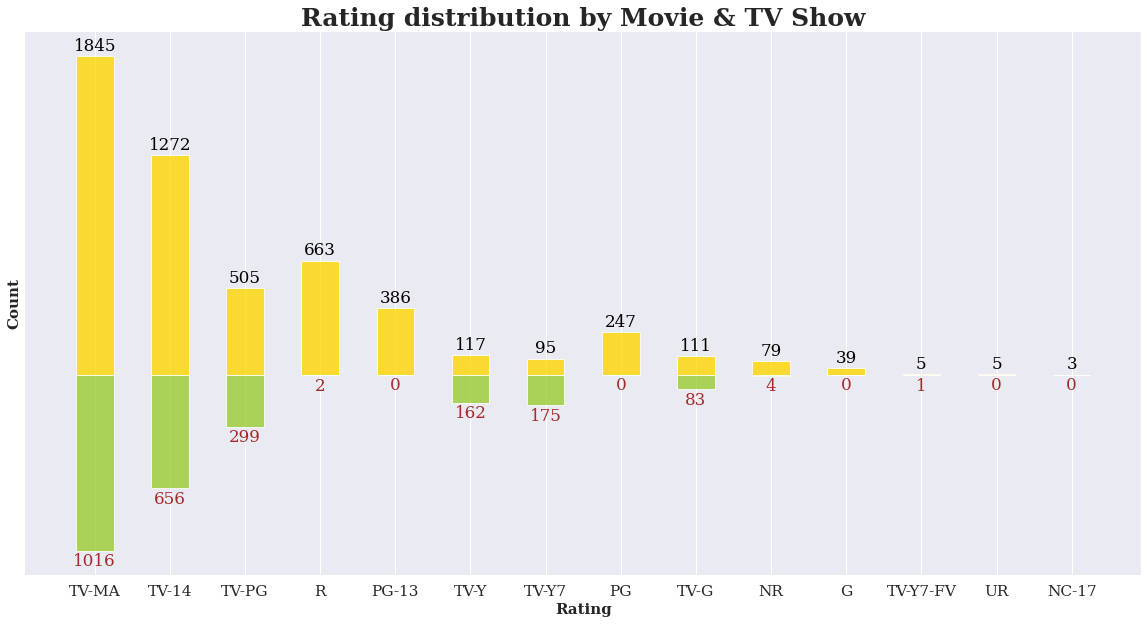

In [446]:
order = pd.DataFrame(netflix_df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])
mf = netflix_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax.bar(movie.index, movie, width=0.5, color='gold', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='yellowgreen', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='brown')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
ax.set_title('Rating distribution by Movie & TV Show', fontsize=25, fontweight='bold', fontfamily='serif')
plt.xlabel('Rating', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Count', fontsize=15, fontweight='bold', fontfamily='serif')



plt.show()

### We observe that some ratings are only applicable to Movies. The most common for both Movies & TV Shows are TV-MA and TV-14.

## **Most of the contents got ratings like**

* **TV-MA** (For Mature Audiences)
* **TV-14** ( May be unsuitable for children under 14 )
* **TV-PG**( Parental Guidance Suggested )
* **R**  (Under 17 requires accompanying parent or adult guardian)

In [447]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['target_ages'] = netflix_df['rating'].replace(ratings_ages)
netflix_df['target_ages'].unique()

# Genre

netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]


## **5.7 Duration**

In [448]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'count', 'first_country', 'month_name_added', 'target_ages', 'genre'],
      dtype='object')

In [449]:
#unique values present in duration column 
netflix_df.duration.nunique()

216

In [450]:
netflix_df.duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [451]:
# replaced all the min with null string
netflix_movies_df['duration'] = netflix_movies_df.duration.str.replace(" min" , "")
# change str to int
netflix_movies_df['duration'] = netflix_movies_df['duration'].astype(int)

Text(0.5, 0, 'Movie duration')

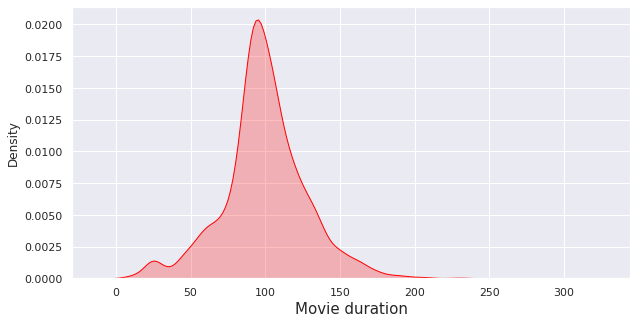

In [452]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
sns.kdeplot(data = netflix_movies_df.duration , shade=True,color='red')
plt.xlabel("Movie duration",fontsize=15)

In [453]:
netflix_df.duration.value_counts().to_frame()

,duration
1 Season,1608
2 Seasons,378
3 Seasons,183
90 min,136
93 min,131
...,...
9 min,1
182 min,1
224 min,1
233 min,1


## **5.8 Listed_in**

In [454]:
netflix_df.listed_in.value_counts().to_frame()

,listed_in
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Anime Series, Crime TV Shows, TV Thrillers",1
"Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows",1
"Crime TV Shows, International TV Shows, Reality TV",1
"International Movies, Romantic Movies, Sci-Fi & Fantasy",1


In [455]:
category = ", ".join(netflix_df['listed_in']).split(", ")

In [456]:
category_list = collections.Counter(category).most_common(50)
category_list_top = category_list[:10]
top_10_category = category_list_top[ ::-1]
top_10_category

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [457]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_category:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

<Figure size 1152x576 with 0 Axes>

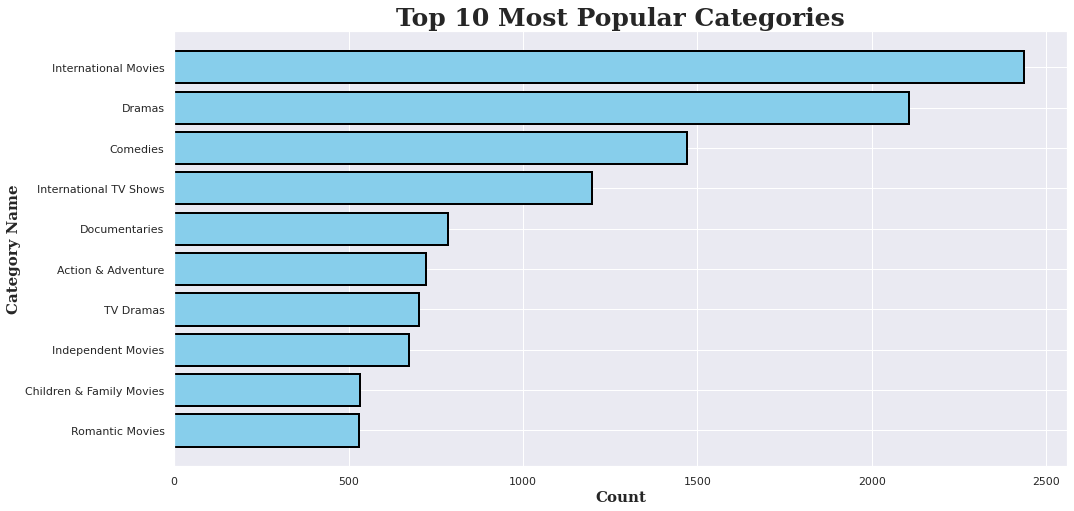

<Figure size 1152x576 with 0 Axes>

In [458]:
plt.figure( figsize = (16,8))
ax = plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color='skyblue',linewidth=2,edgecolor='black')
plt.title("Top 10 Most Popular Categories",fontname = "serif",fontsize=25, fontweight='bold')
plt.xlabel("Count", fontname = "serif",fontsize=15, fontweight='bold' )
plt.ylabel("Category Name" ,fontname = "serif",fontsize=15, fontweight='bold' )
plt.figure( figsize = (16,8))

## **Target Ages**

### Does Netflix uniformly target certain demographics? Or does this vary by country?

In [459]:
data = netflix_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = netflix_df.loc[netflix_df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

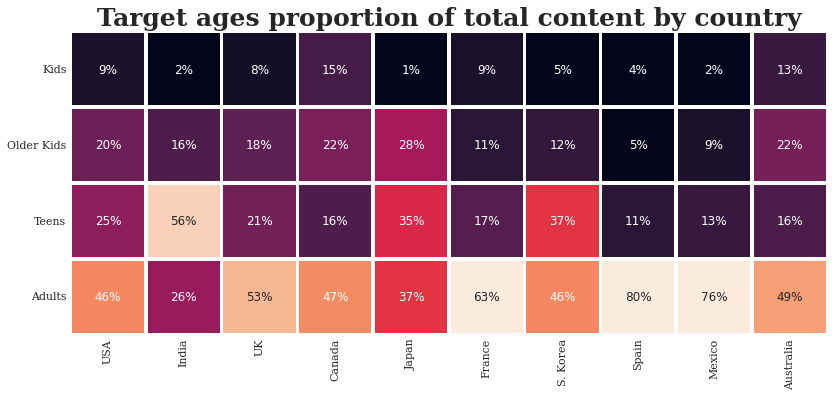

In [460]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Australia']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


ax.set_title('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=25)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### **Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.**

### Let's have a quick look at the lag between when content is released and when it is added on Netflix.

In [461]:
netflix_df.type

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7777, dtype: object

In [462]:
netflix_shows_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'count', 'first_country', 'year_added'],
      dtype='object')

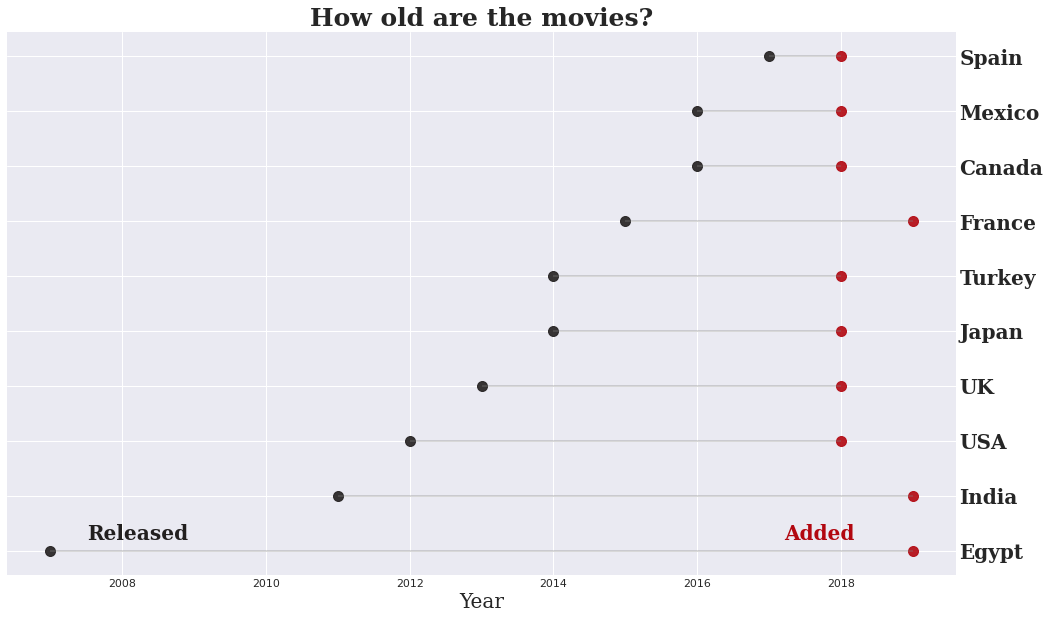

In [463]:

data = netflix_movies_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]

# top 10 country
data = data['first_country']

df_loli = netflix_movies_df.loc[netflix_movies_df['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')


my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(17, 10))

ax.set_title('How old are the movies?', fontsize=25, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=20, fontweight='bold')

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')


plt.xlabel('Year', fontsize=20, fontweight='light', fontfamily='serif')
plt.show()


* **The average gap between when 
content is released, and when it
is then added on Netflix varies
by country.** 

* **In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.**

### What about TV shows...

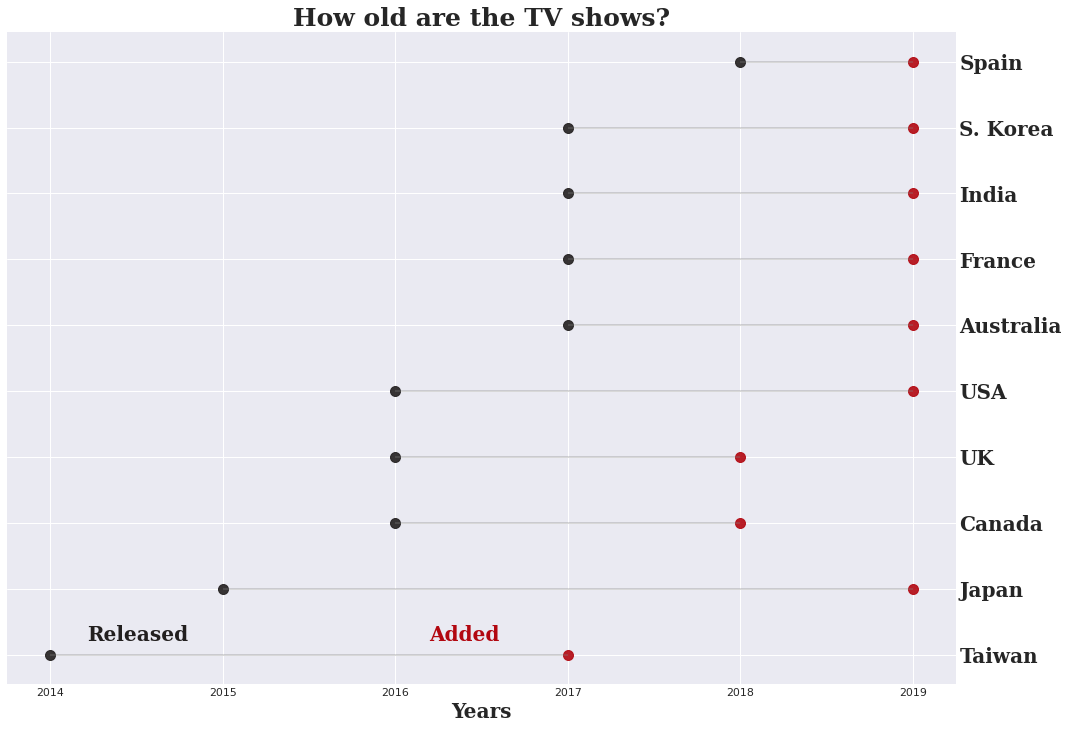

In [464]:
data = netflix_shows_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = netflix_shows_df.loc[netflix_shows_df['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(17, 12))

ax.set_title('How old are the TV shows?', fontsize=25, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=20,fontweight="bold")


fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')



ax.tick_params(axis=u'both', which=u'both',length=0)
plt.xlabel('Years', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()


* **The gap for TV shows seems
more regular than for movies.**

* **This is likely due to subsequent
series being released
year-on-year.**

* **Spain seems to have
the newest content
overall.**

In [465]:
#nlp
